In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./提交数据/lgbm_submission.csv")
df["error"] = abs(df["item_cnt_month_valid"]-df["item_cnt_month_pred"])/df["item_cnt_month_valid"]
df_38 = df[df["date_block_num"]==38].sort_values(by="error",ascending=False)
df_39 = df[df["date_block_num"]==39].sort_values(by="error",ascending=False)


In [3]:
print(len(df_38))
print(len(df_39))

2045
1852


In [4]:
# 筛选出误差比较大的 这些都是本来
df_38_error = df_38[(df_38["error"]>10)&(df_38["item_cnt_month_pred"]>50)]
df_39_error = df_39[(df_39["error"]>10)&(df_39["item_cnt_month_pred"]>50)]

In [5]:
print(len(df_38_error))
print(len(df_39_error))


80
175


In [6]:
# 统计一下这些商品的属性分布
def error_by_col(col_name):
    print("-"*5,col_name,"-"*5)
    print("38:")
    print(df_38_error[col_name].value_counts())
    print("39:")
    print(df_39_error[col_name].value_counts())

In [7]:
# 地区
error_by_col("sales_region_code")

----- sales_region_code -----
38:
105    29
101    21
103    16
102    14
Name: sales_region_code, dtype: int64
39:
105    59
101    46
102    37
103    33
Name: sales_region_code, dtype: int64


In [8]:
# 大类
error_by_col("first_cate_code")

----- first_cate_code -----
38:
306    21
302    14
303    12
307    12
305     9
308     8
304     3
301     1
Name: first_cate_code, dtype: int64
39:
306    51
305    30
303    29
302    22
307    15
308    13
304    10
301     5
Name: first_cate_code, dtype: int64


In [9]:
# 大类
error_by_col("second_cate_code")

----- second_cate_code -----
38:
407    18
408    14
401    12
403    12
412     9
404     8
402     3
409     3
405     1
Name: second_cate_code, dtype: int64
39:
407    45
412    30
401    27
408    22
403    15
404    13
409    10
402     6
405     5
410     1
411     1
Name: second_cate_code, dtype: int64


# 画一下这些商品
目前先研究预测第38月的

In [10]:
df_38_error

,date_block_num,sales_region_code,item_code,first_cate_code,second_cate_code,item_cnt_month_valid,item_cnt_month_pred,error
900,38,102,21407,308,404,5.0,1785.430885,356.086177
1318,38,103,21027,302,408,3.0,569.026429,188.675476
381,38,101,21468,305,412,10.0,1577.995216,156.799522
63,38,101,20248,306,402,12.0,1449.193518,119.766126
1158,38,103,20391,306,407,2.0,197.227168,97.613584
...,...,...,...,...,...,...,...,...
237,38,101,20896,307,403,540.0,7039.328560,12.035794
514,38,101,22052,302,408,4.0,50.782220,11.695555
1211,38,103,20597,302,408,626.0,7792.927249,11.448766
1620,38,105,20337,302,408,87.0,1067.816827,11.273757


In [11]:
# 使用 groupby 和 apply 方法生成字典
result_dict = df_38_error.groupby('item_code')['sales_region_code'].apply(list).to_dict()

result_dict

{20056: [101],
 20058: [105],
 20076: [102, 101],
 20139: [101, 102],
 20158: [105],
 20172: [102],
 20193: [101],
 20248: [101, 105, 103],
 20261: [105],
 20296: [103],
 20311: [101],
 20337: [105],
 20350: [101],
 20384: [105],
 20391: [103],
 20465: [103],
 20472: [105],
 20523: [105],
 20587: [102],
 20597: [103],
 20631: [101],
 20648: [101],
 20660: [102],
 20689: [101],
 20711: [105],
 20731: [105],
 20747: [105],
 20809: [105],
 20831: [101],
 20858: [105],
 20862: [101],
 20878: [103, 101],
 20880: [105],
 20896: [101],
 20944: [102],
 20957: [105],
 21016: [101],
 21027: [103],
 21053: [101],
 21075: [103],
 21105: [105],
 21198: [101],
 21278: [105],
 21285: [105],
 21298: [105],
 21321: [103],
 21330: [103],
 21358: [105],
 21359: [105],
 21361: [103],
 21407: [102],
 21433: [105],
 21440: [105],
 21468: [101, 103],
 21504: [105],
 21524: [102],
 21589: [105],
 21644: [105],
 21651: [105],
 21707: [102],
 21755: [103],
 21760: [102],
 21772: [102],
 21839: [102, 101, 103],


In [12]:
data = pd.read_csv("./中间数据/月度数据无编码_12.csv")

In [13]:
data.columns

Index(['date_block_num', 'sales_region_code', 'item_code', 'item_cnt_month',
       'first_cate_code', 'second_cate_code', 'item_cnt_month_lag_1',
       'item_cnt_month_lag_2', 'item_cnt_month_lag_3', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'date_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_2',
       'date_item_avg_item_cnt_lag_3', 'date_item_avg_item_cnt_lag_6',
       'date_item_avg_item_cnt_lag_12', 'date_region_avg_item_cnt_lag_1',
       'date_region_avg_item_cnt_lag_2', 'date_region_avg_item_cnt_lag_3',
       'date_region_avg_item_cnt_lag_6', 'date_region_avg_item_cnt_lag_12',
       'date_region_item_avg_item_cnt_lag_1',
       'date_region_item_avg_item_cnt_lag_2',
       'date_region_item_avg_item_cnt_lag_3',
       'date_region_item_avg_item_cnt_lag_6',
       'date_region_item_avg_item_cnt_lag_12',
       'date_region_subtype_avg_item_cnt_lag_1', 'delta_price_lag',
       'delta_revenue_lag_1', 'month', 'days', 'i

插个眼，这里还可以根据不同的类别，来进行画图的分析，甚至可以画在一个图上

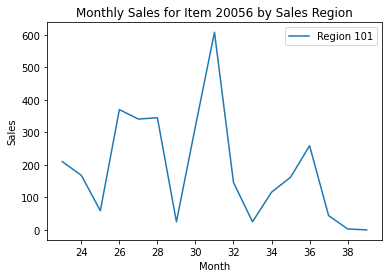

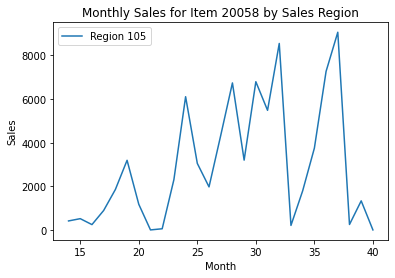

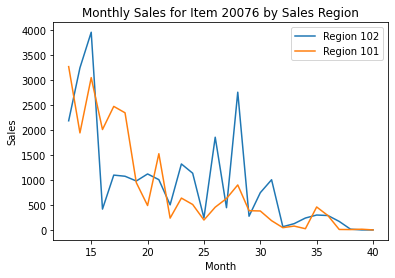

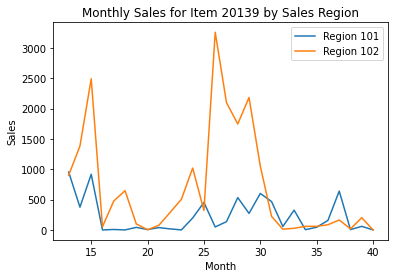

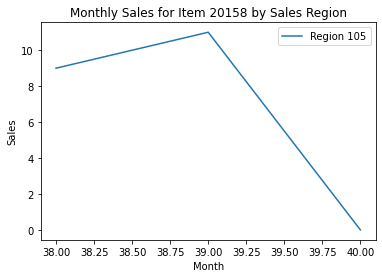

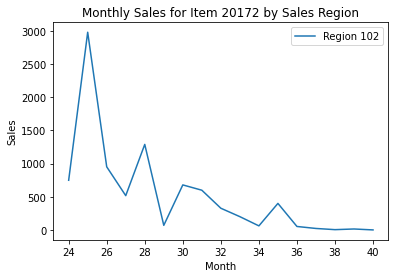

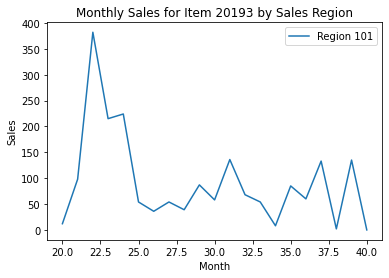

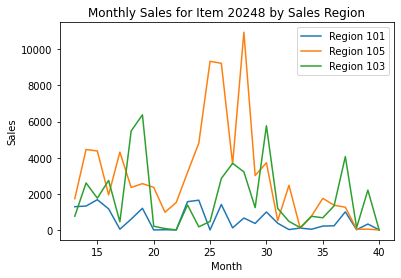

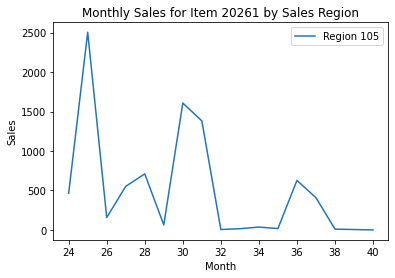

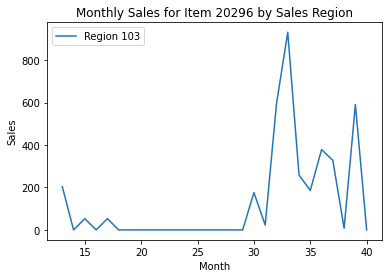

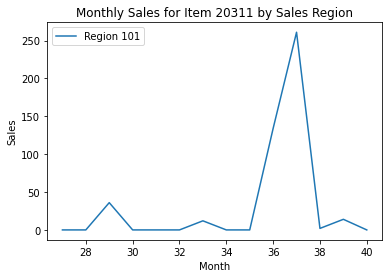

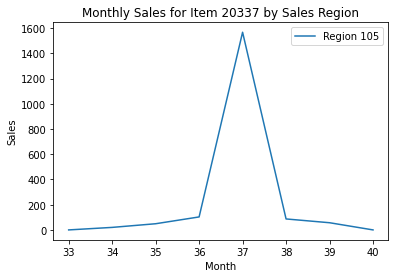

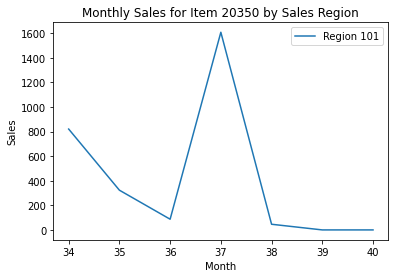

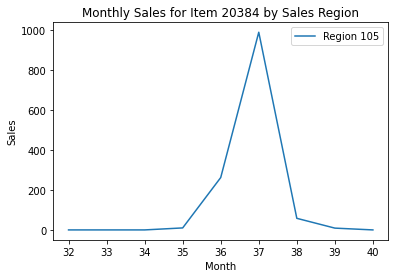

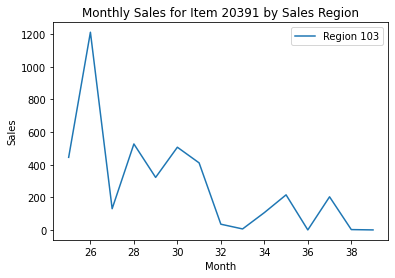

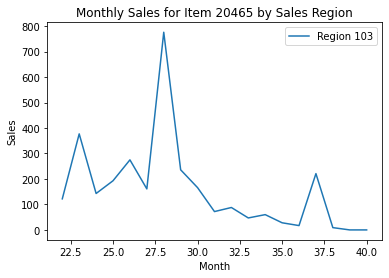

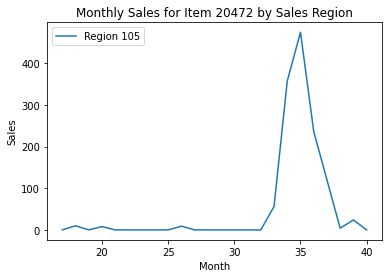

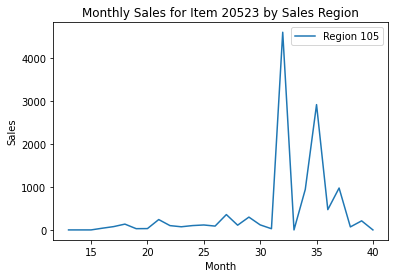

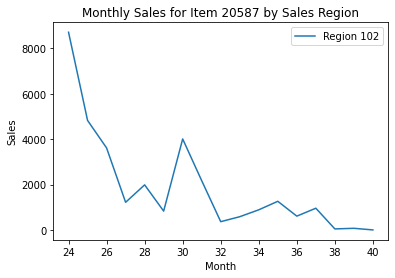

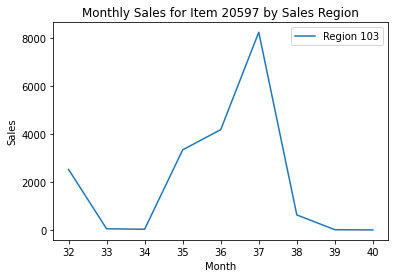

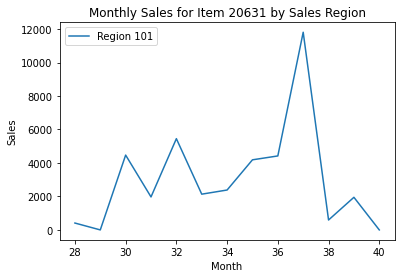

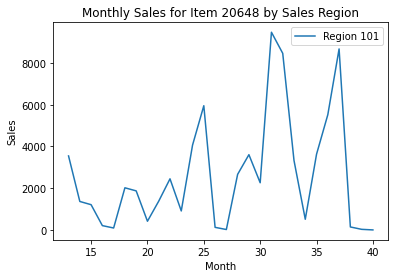

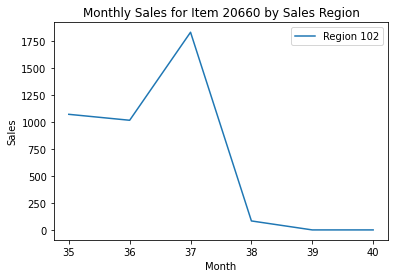

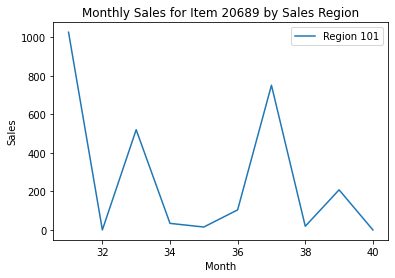

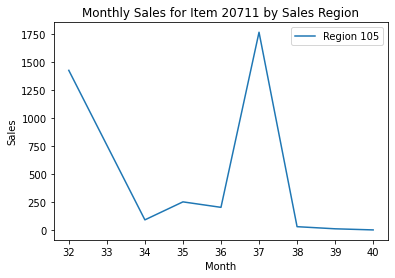

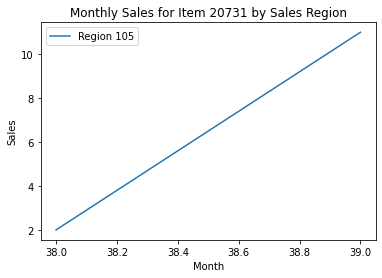

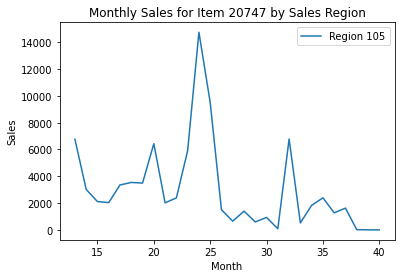

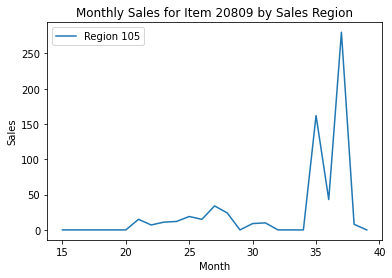

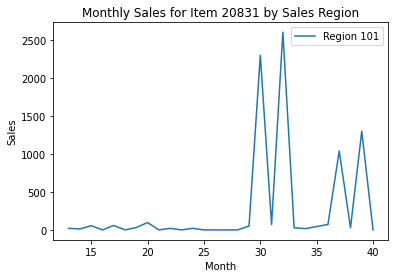

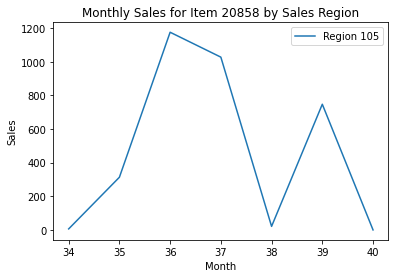

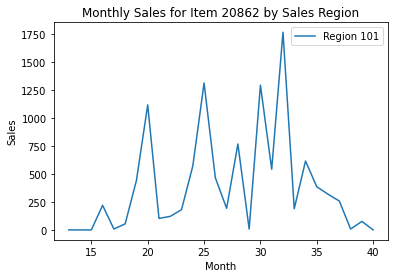

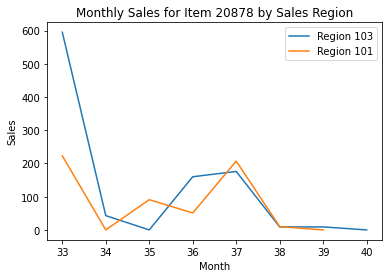

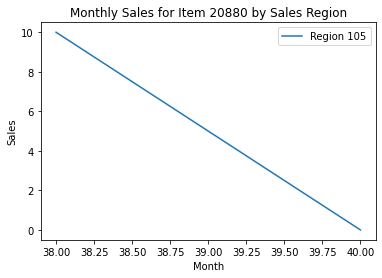

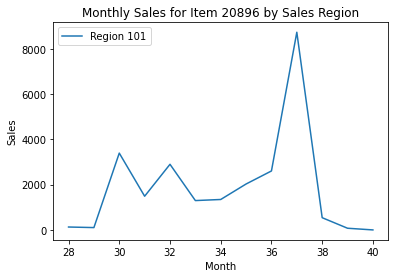

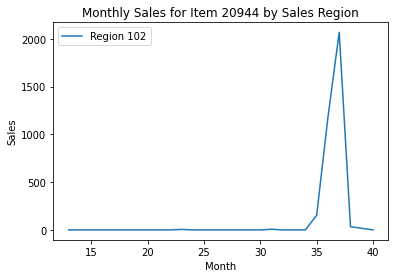

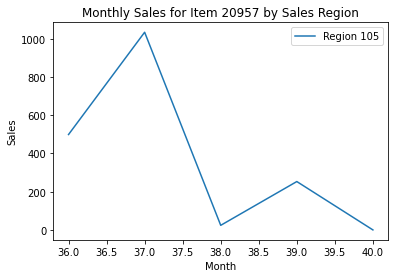

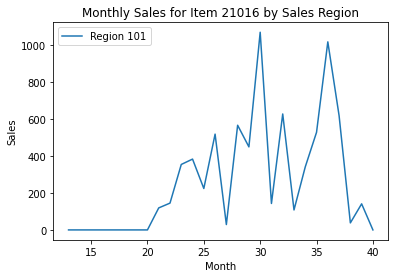

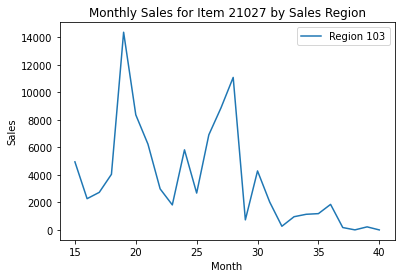

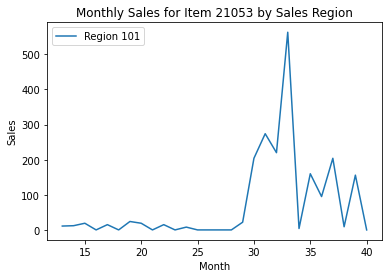

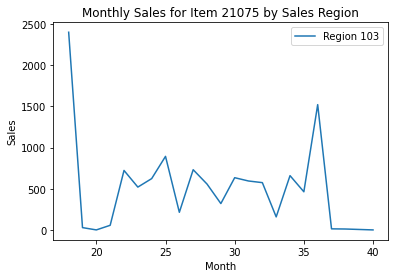

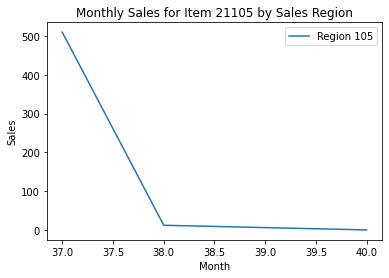

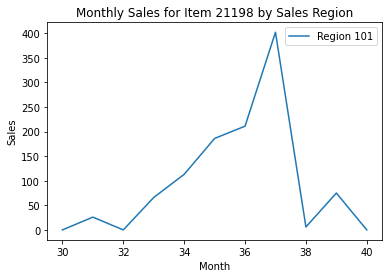

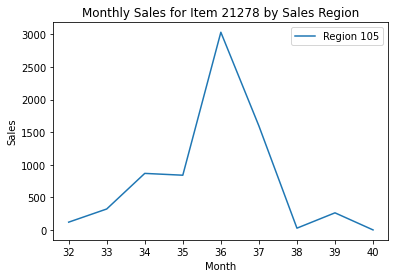

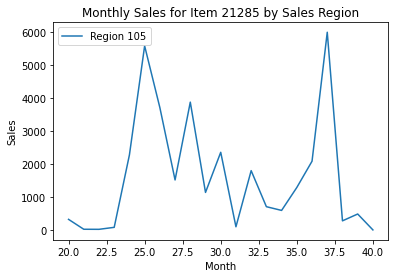

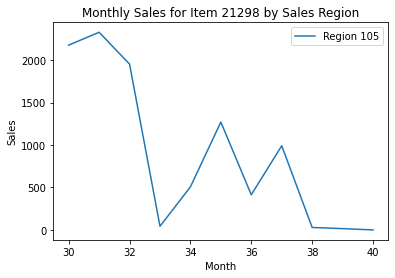

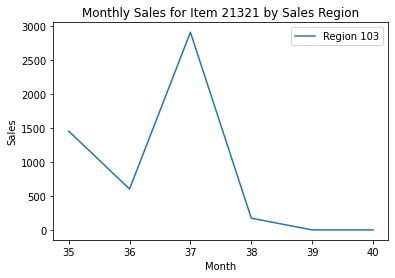

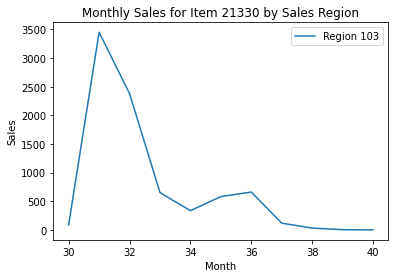

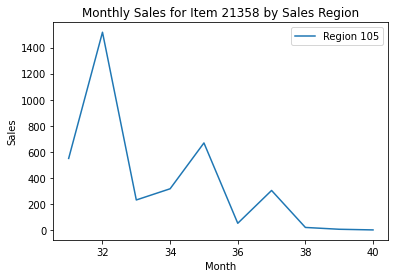

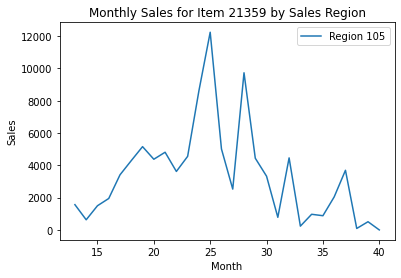

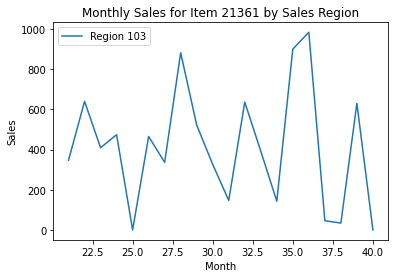

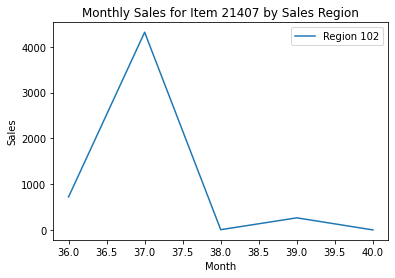

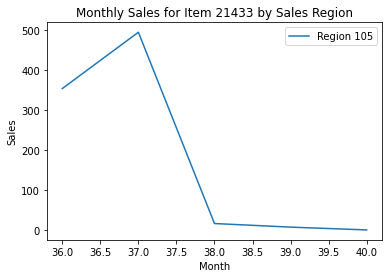

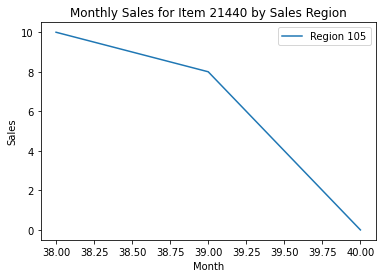

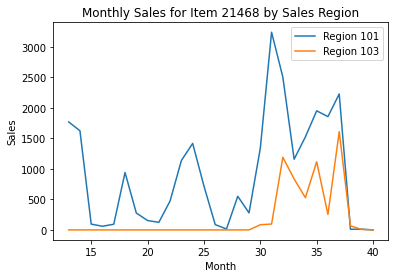

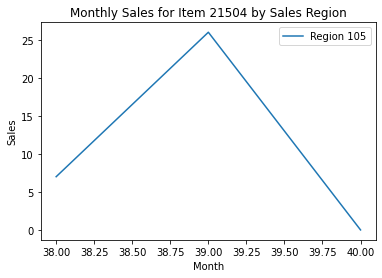

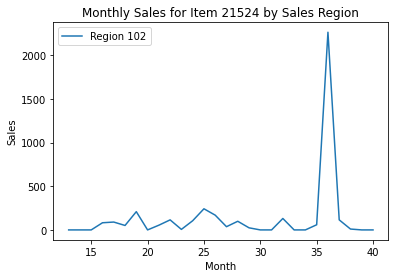

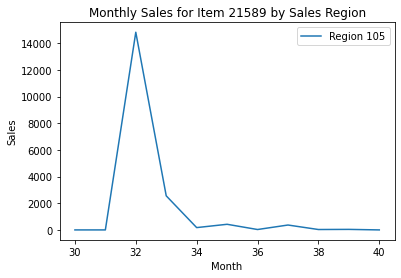

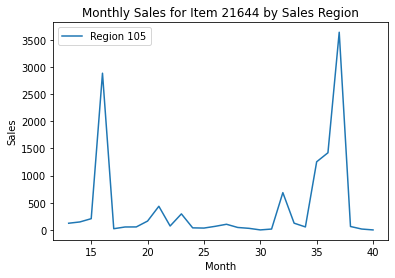

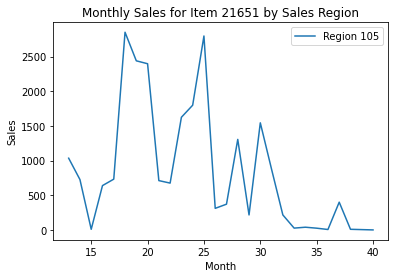

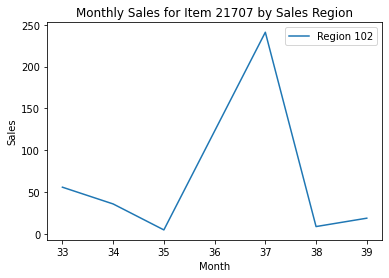

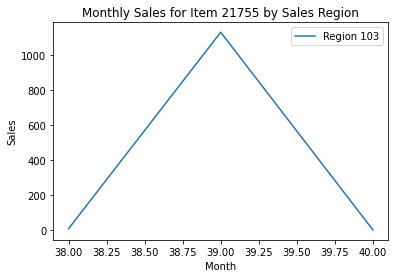

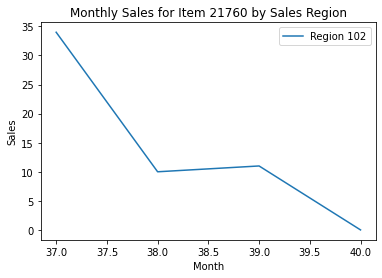

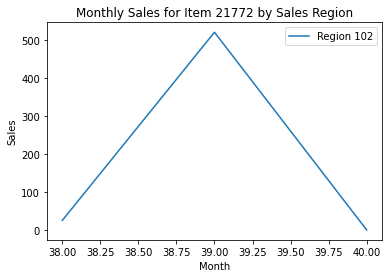

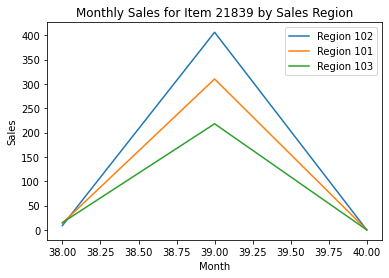

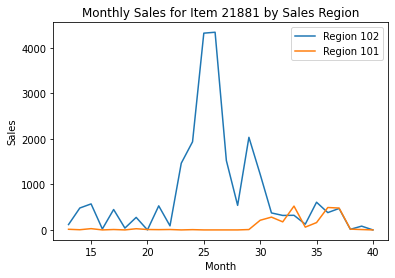

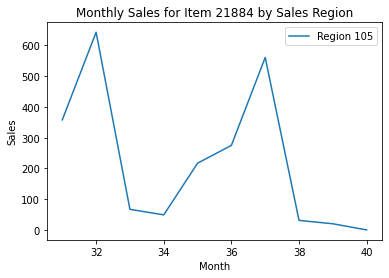

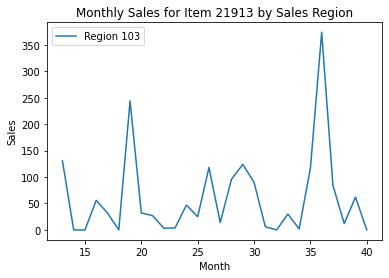

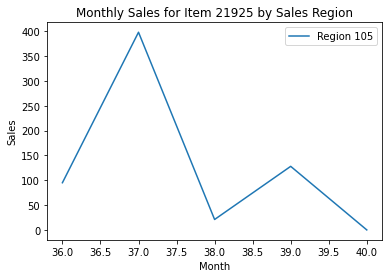

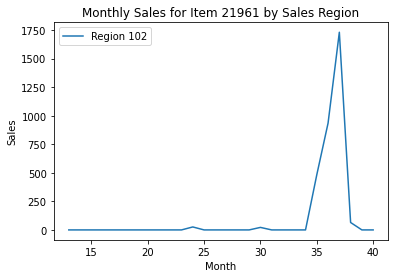

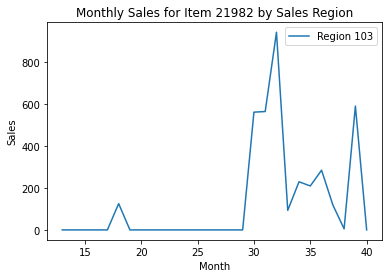

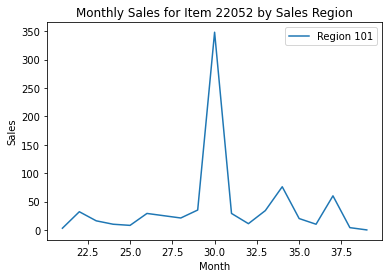

In [14]:

for item, region_codes in result_dict.items():
    for region_code in region_codes:
        cols = ["date_block_num","sales_region_code","item_cnt_month"]
        item_region_df = data[(data["item_code"]==item) & (data["sales_region_code"]==region_code)].loc[:,cols]
        if not item_region_df.empty:
                plt.plot(item_region_df['date_block_num'], item_region_df['item_cnt_month'], label=f'Region {region_code}')
    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title(f'Monthly Sales for Item {item} by Sales Region')
    plt.legend()
    plt.show()
    # 绘制折线图



# 尝试处理从训练数据中剔除这些商品

In [15]:
test_df = pd.read_csv("./示例数据/predict_sku1.csv")

In [16]:
train_df =  pd.read_csv("./中间数据/月度数据无编码_12.csv")

In [17]:
# 使用 groupby 和 apply 方法生成字典
result_dict_38 = df_38_error.groupby('item_code')['sales_region_code'].apply(list).to_dict()
result_dict_39 = df_39_error.groupby('item_code')['sales_region_code'].apply(list).to_dict()


查看哪些是误差大的是要预测的，哪些是不要的，当然这里合并了两个月的，有时间的话，其实可以试试其他验证集，不止是38、39个月的数据，是不是也是这些元组
38是78，39是170，合并后有212组是要预测的，有18组是不需要预测的，这18组完全可以直接在训练集里剔除

In [18]:

test_items = set(zip(test_df['item_code'], test_df['sales_region_code']))
result_items_38 = set(zip(df_38_error['item_code'], df_38_error['sales_region_code']))
result_items_39 = set(zip(df_39_error['item_code'], df_39_error['sales_region_code']))
result_items = result_items_38.union(result_items_39)

# 交集表示既在 test_df 中，又在 result_dict_38 中的商品和地区组合 
# 这俩是用来分析的，我们用于删除的是result_items
common_items = test_items.intersection(result_items)

# 差集表示在 result_dict_38 中，但不在 test_df 中的商品和地区组合
missing_items = result_items - test_items

# 打印结果
print(f'Number of common items: {len(common_items)}')
print(f'Number of missing items: {len(missing_items)}')


Number of common items: 219
Number of missing items: 18


In [19]:
common_items

{(20006, 105),
 (20038, 105),
 (20039, 105),
 (20058, 105),
 (20076, 101),
 (20076, 102),
 (20085, 102),
 (20121, 102),
 (20131, 102),
 (20131, 103),
 (20139, 101),
 (20139, 102),
 (20158, 105),
 (20162, 101),
 (20172, 102),
 (20193, 101),
 (20207, 103),
 (20226, 103),
 (20231, 105),
 (20235, 101),
 (20240, 105),
 (20248, 101),
 (20248, 103),
 (20248, 105),
 (20256, 105),
 (20261, 105),
 (20282, 105),
 (20292, 101),
 (20296, 103),
 (20311, 101),
 (20325, 101),
 (20337, 105),
 (20343, 101),
 (20344, 102),
 (20347, 105),
 (20350, 101),
 (20357, 105),
 (20384, 105),
 (20391, 101),
 (20396, 103),
 (20398, 103),
 (20398, 105),
 (20405, 103),
 (20407, 105),
 (20418, 105),
 (20427, 102),
 (20428, 101),
 (20433, 103),
 (20445, 102),
 (20452, 102),
 (20465, 103),
 (20472, 102),
 (20472, 105),
 (20473, 105),
 (20478, 101),
 (20492, 103),
 (20522, 103),
 (20523, 105),
 (20533, 103),
 (20545, 103),
 (20563, 101),
 (20563, 103),
 (20580, 105),
 (20587, 102),
 (20597, 103),
 (20627, 101),
 (20630, 1

In [20]:
# 将common_items转换为DataFrame
df_common_items = pd.DataFrame(list(common_items), columns=['item_code', 'sales_region_code'])

# 保存为csv文件
df_common_items.to_csv('./中间数据/common_items.csv', index=False)


In [21]:
# 过滤数据
item_codes = [item[0] for item in result_items]
sales_region_codes = [item[1] for item in result_items]
filtered_train_df = train_df[~(train_df['item_code'].isin(item_codes) & train_df['sales_region_code'].isin(sales_region_codes))]


In [22]:
filtered_train_df.to_csv("./中间数据/月度数据无编码_12_剔除误差.csv",index=False)
